In [ ]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [4]:
# Step 2: Load the dataset
file_path = ( 'crop_data.csv' )  # Replace with the file path if different
df = pd.read_csv(file_path)


In [5]:
# Step 3: Explore the dataset
print("First few rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nDataset description:")
print(df.describe())

First few rows of the dataset:
    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), ob

In [6]:
# Step 4: Data Preprocessing
# Assume the last column is the target (crop recommendation)
X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target variable (last column)

In [7]:
# Encode target variable if it's categorical
y = pd.factorize(y)[0]  # Convert to numerical categories

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
# Step 4: Data Preprocessing
# Assume the last column is the target (crop recommendation)
X = df.iloc[:, :-1]  # Features (all columns except the last)
y = df.iloc[:, -1]   # Target variable (last column)

In [9]:
# Encode target variable if it's categorical
y = pd.factorize(y)[0]  # Convert to numerical categories


In [10]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [13]:
# Step 5: Build the MLP Model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer with softmax for multi-class

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


C:\Users\himan\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
# Step 6: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_split=0.2, verbose=1)

# Step 7: Evaluate the Model

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1870 - loss: 2.8194 - val_accuracy: 0.4403 - val_loss: 1.7169
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6558 - loss: 1.2845 - val_accuracy: 0.7244 - val_loss: 0.7714
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8245 - loss: 0.5982 - val_accuracy: 0.8835 - val_loss: 0.4349
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8973 - loss: 0.3708 - val_accuracy: 0.8750 - val_loss: 0.3489
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9059 - loss: 0.2972 - val_accuracy: 0.9119 - val_loss: 0.2622
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9293 - loss: 0.2308 - val_accuracy: 0.9489 - val_loss: 0.2038
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9482 - loss: 0.2046 - val_accuracy: 0.9318 - val_loss: 0.1874
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9472 - loss: 0.1553 - val_accuracy: 0.

In [15]:
# Step 7: Evaluate the Model
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


In [16]:
# Print accuracy and classification report
print("\nAccuracy Score:", accuracy_score(y_test, y_pred_classes))
print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))


Accuracy Score: 0.9681818181818181

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        19
           1       1.00      0.95      0.98        21
           2       1.00      1.00      1.00        26
           3       0.95      0.95      0.95        20
           4       0.95      0.91      0.93        23
           5       1.00      0.88      0.93        24
           6       1.00      1.00      1.00        19
           7       0.95      0.95      0.95        20
           8       0.73      1.00      0.85        11
           9       1.00      1.00      1.00        23
          10       1.00      1.00      1.00        21
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        14
          13       1.00      1.00      1.00        19
          14       1.00      1.00      1.00        17
          15       1.00      1.00      1.00        23
          16       0

Accuracy: 1.00


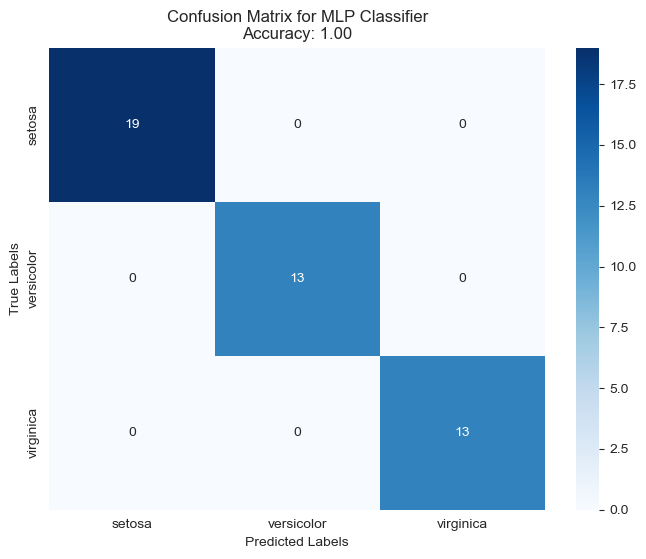

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

# Load data and split into train and test sets
data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=42)

# Initialize and train the MLP classifier
mlp = MLPClassifier(random_state=42, max_iter=1000)
mlp.fit(X_train, y_train)

# Predict the test set
y_pred = mlp.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title(f"Confusion Matrix for MLP Classifier\nAccuracy: {accuracy:.2f}")
plt.show()


In [3]:
import pickle

# Save the trained SVM model to a pickle file
pickle_file_path = '/mnt/data/svm_crop_recommendation_model.pkl'
with open(pickle_file_path, 'wb') as file:
    pickle.dump(svm_model, file)

pickle_file_path


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/svm_crop_recommendation_model.pkl'